<a href="https://colab.research.google.com/github/shivi13102/Healthcare-Fraud-Provider-Detection-Analysis/blob/main/dataModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the final data
train_beneficiary = pd.read_excel('/content/drive/My Drive/FDS PROJECT/Final_data/train_bene_final_data.xlsx')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (precision_score, recall_score, f1_score,
                             roc_auc_score, accuracy_score, classification_report)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#**A) Supervised:**

In [ ]:
threshold_ip = train_beneficiary['IPAnnualReimbursementAmt'].quantile(0.95)  # Top 5% as threshold
threshold_op = train_beneficiary['OPAnnualReimbursementAmt'].quantile(0.95)

train_beneficiary['fraud'] = np.where(
    (train_beneficiary['IPAnnualReimbursementAmt'] > threshold_ip) |
    (train_beneficiary['OPAnnualReimbursementAmt'] > threshold_op),
    1,
    0
)

In [ ]:
# Define features (X) and target (y)
X = train_beneficiary.drop(columns=['fraud', 'DOB', 'DOD'])  # Drop non-feature columns like DOB/DOD
y = train_beneficiary['fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a column transformer to preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical features
    ]
)

In [ ]:
# Initialize models
logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
mlp_model = MLPClassifier(random_state=42)

In [ ]:
# Create pipelines for each model
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logistic_model)])
decision_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', decision_tree_model)])
random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', random_forest_model)])
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', xgb_model)])
mlp_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', mlp_model)])

In [ ]:
# Train models
logistic_pipeline.fit(X_train, y_train)
decision_tree_pipeline.fit(X_train, y_train)
random_forest_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)
mlp_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:28:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Race', 'State', 'Country',
                                                   'NoOfMonths_PartACov',
                                                   'NoOfMonths_PartBCov',
                                                   'ChronicCond_Alzheimer',
                                                   'ChronicCond_Heartfailure',
                                                   'ChronicCond_KidneyDisease',
                                                   'ChronicCond_Cancer',
                                                   'ChronicCond_ObstrPulmonary',
                                                   'ChronicCond_Depression',
                                                   'ChronicCond_Diabetes',
                                                   'ChronicCond_Is...
                                                   'ChronicCond_Osteoporasis',
                                                   'ChronicCond_rheumatoidarthritis',
                                                   'ChronicCond_stroke',
                                                   'IPAnnualReimbursementAmt',
                                                   'IPAnnualDeductibleAmt',
                                                   'OPAnnualReimbursementAmt',
                                                   'OPAnnualDeductibleAmt',
                                                   'Age',
                                                   'ChronicConditionCount']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BeneID', 'Gender',
                                                   'RenalDiseaseIndicator'])])),
                ('classifier', MLPClassifier(random_state=42))])

In [ ]:
# Make predictions
logistic_preds = logistic_pipeline.predict(X_test)
decision_tree_preds = decision_tree_pipeline.predict(X_test)
random_forest_preds = random_forest_pipeline.predict(X_test)
xgb_preds = xgb_pipeline.predict(X_test)
mlp_preds = mlp_pipeline.predict(X_test)

In [ ]:
# Function to evaluate model
def evaluate_model(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("-" * 50)

In [ ]:
# Evaluate each model
display(evaluate_model(y_test, logistic_preds, "Logistic Regression"))
display(evaluate_model(y_test, decision_tree_preds, "Decision Tree"))
display(evaluate_model(y_test, random_forest_preds, "Random Forest"))
display(evaluate_model(y_test, xgb_preds, "XGBoost"))
display(evaluate_model(y_test, mlp_preds, "Neural Network (MLP)"))

Model: Logistic Regression
Accuracy: 0.9717
Precision: 0.8750
Recall: 0.8191
F1 Score: 0.8462
AUC-ROC: 0.9034

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2687
           1       0.88      0.82      0.85       282

    accuracy                           0.97      2969
   macro avg       0.93      0.90      0.92      2969
weighted avg       0.97      0.97      0.97      2969

--------------------------------------------------


None

Model: Decision Tree
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2687
           1       1.00      1.00      1.00       282

    accuracy                           1.00      2969
   macro avg       1.00      1.00      1.00      2969
weighted avg       1.00      1.00      1.00      2969

--------------------------------------------------


None

Model: Random Forest
Accuracy: 0.9899
Precision: 1.0000
Recall: 0.8936
F1 Score: 0.9438
AUC-ROC: 0.9468

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2687
           1       1.00      0.89      0.94       282

    accuracy                           0.99      2969
   macro avg       0.99      0.95      0.97      2969
weighted avg       0.99      0.99      0.99      2969

--------------------------------------------------


None

Model: XGBoost
Accuracy: 0.9997
Precision: 0.9965
Recall: 1.0000
F1 Score: 0.9982
AUC-ROC: 0.9998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2687
           1       1.00      1.00      1.00       282

    accuracy                           1.00      2969
   macro avg       1.00      1.00      1.00      2969
weighted avg       1.00      1.00      1.00      2969

--------------------------------------------------


None

Model: Neural Network (MLP)
Accuracy: 0.9801
Precision: 0.9145
Recall: 0.8723
F1 Score: 0.8929
AUC-ROC: 0.9319

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2687
           1       0.91      0.87      0.89       282

    accuracy                           0.98      2969
   macro avg       0.95      0.93      0.94      2969
weighted avg       0.98      0.98      0.98      2969

--------------------------------------------------


None

Conclusion
The evaluation of different models for detecting healthcare provider fraud yielded the following insights:

Logistic Regression: Achieved an accuracy of 97.17%, with a precision of 87.50% and a recall of 81.91% for detecting fraudulent claims. The F1 score of 84.62% indicates a balanced performance between precision and recall, while the AUC-ROC score of 0.9034 suggests good model performance in distinguishing between fraud and non-fraud cases. However, compared to other models, it slightly underperforms in recall, missing some fraudulent cases.

Decision Tree: Demonstrated perfect performance across all metrics with 100% accuracy, precision, recall, F1 score, and AUC-ROC. This indicates that the model fits the training data exceptionally well. However, such results typically indicate overfitting, meaning it may not generalize well to new, unseen data.

Random Forest: Showed a high accuracy of 98.99%, with a perfect precision of 100% and a recall of 89.36% for detecting fraudulent cases. The F1 score of 94.38% and AUC-ROC of 0.9468 indicate that it effectively balances the detection of true positives while minimizing false positives. This model is more robust compared to the Decision Tree, offering better generalization.

XGBoost: Performed exceptionally well with a near-perfect accuracy of 99.97% and a precision of 99.65%. Its recall for fraudulent cases was 100%, leading to an F1 score of 99.82% and an AUC-ROC of 0.9998. This model shows excellent detection capabilities, achieving a perfect balance between precision and recall, making it highly reliable for identifying fraudulent claims.

Neural Network (MLP): Provided a strong performance with an accuracy of 98.01%, precision of 91.45%, and recall of 87.23%. The F1 score of 89.29% indicates a good balance between precision and recall, and the AUC-ROC score of 0.9319 demonstrates strong discrimination between fraudulent and non-fraudulent cases. It is effective but slightly less accurate than Random Forest and XGBoost.

Summary
Among all models, XGBoost stands out as the best performer, with near-perfect accuracy and a balanced approach in detecting fraud cases without missing potential positives. Random Forest is also a strong contender, offering high precision and good generalization. While Decision Tree provides perfect results on the given dataset, it may suffer from overfitting, making it less reliable for real-world applications. Logistic Regression and Neural Network (MLP) models, though not as accurate, still provide valuable insights and may be preferable when simpler, more interpretable models are required.

Overall, XGBoost is recommended for deployment due to its superior performance and ability to accurately identify fraudulent claims.

#**B) Unsupervised:**

* Unsupervised learning techniques were applied to identify anomalies in claims data, which may signal potential fraud.
* Various models, including KMeans clustering, Isolation Forest, DBSCAN, and an Autoencoder, were employed to analyze the dataset.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Load and preprocess the data (assuming the dataset is loaded as 'train_beneficiary')
# Drop the label column
X = train_beneficiary.drop(columns=['fraud'])  # Adjust column names as necessary

In [ ]:
# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# One-Hot Encoding for non-numeric columns
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
X_encoded = encoder.fit_transform(X[non_numeric_cols])

# Create DataFrame for encoded features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(non_numeric_cols))

# Combine numeric and encoded features
X_combined = pd.concat([X[numeric_cols].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Set number of clusters
kmeans.fit(X_scaled)
X_combined['KMeans_Cluster'] = kmeans.labels_

In [ ]:
# Identify outliers based on K-Means
outliers_kmeans = X_combined[X_combined['KMeans_Cluster'] == 4]  # Assuming cluster 4 is the outlier cluster
print("Outliers detected by K-Means:")
display(outliers_kmeans)

Outliers detected by K-Means:


,Race,State,Country,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,DOD_2009-09-01T00:00:00.000000000,DOD_2009-10-01T00:00:00.000000000,DOD_2009-11-01T00:00:00.000000000,DOD_2009-12-01T00:00:00.000000000,DOD_NaT,Gender_F,Gender_M,RenalDiseaseIndicator_N,RenalDiseaseIndicator_Y,KMeans_Cluster
0,3,7,20,12,12,1,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4
1,1,3,90,12,12,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4
2,1,5,90,12,12,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4
3,1,33,20,0,12,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4
4,1,18,60,12,12,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9890,1,50,20,12,12,1,1,1,0,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4
9891,1,5,90,12,12,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4
9892,2,1,380,12,12,1,0,0,0,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4
9893,1,5,90,12,12,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4


In [ ]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples for your data
dbscan.fit(X_scaled)
X_combined['DBSCAN_Labels'] = dbscan.labels_

In [ ]:
# Identify outliers based on DBSCAN
outliers_dbscan = X_combined[X_combined['DBSCAN_Labels'] == -1]
print("Outliers detected by DBSCAN:")
display(outliers_dbscan)

Outliers detected by DBSCAN:


,Race,State,Country,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,DOD_2009-10-01T00:00:00.000000000,DOD_2009-11-01T00:00:00.000000000,DOD_2009-12-01T00:00:00.000000000,DOD_NaT,Gender_F,Gender_M,RenalDiseaseIndicator_N,RenalDiseaseIndicator_Y,KMeans_Cluster,DBSCAN_Labels
0,3,7,20,12,12,1,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4,-1
1,1,3,90,12,12,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4,-1
2,1,5,90,12,12,0,0,0,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4,-1
3,1,33,20,0,12,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4,-1
4,1,18,60,12,12,0,0,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9890,1,50,20,12,12,1,1,1,0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4,-1
9891,1,5,90,12,12,0,0,0,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4,-1
9892,2,1,380,12,12,1,0,0,0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4,-1
9893,1,5,90,12,12,0,0,0,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4,-1


In [ ]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination rate
outliers_iso = iso_forest.fit_predict(X_scaled)

In [ ]:
# Mark anomalies
X_combined['Isolation_Forest'] = outliers_iso
outliers_isolation_forest = X_combined[X_combined['Isolation_Forest'] == -1]
print("Outliers detected by Isolation Forest:")
display(outliers_isolation_forest)

Outliers detected by Isolation Forest:


,Race,State,Country,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,DOD_2009-11-01T00:00:00.000000000,DOD_2009-12-01T00:00:00.000000000,DOD_NaT,Gender_F,Gender_M,RenalDiseaseIndicator_N,RenalDiseaseIndicator_Y,KMeans_Cluster,DBSCAN_Labels,Isolation_Forest
7,3,12,20,12,12,1,0,1,1,1,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4,-1,-1
20,1,22,60,12,12,0,1,1,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4,-1,-1
30,1,50,20,12,12,1,1,1,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4,-1,-1
88,1,49,90,12,12,0,1,1,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4,-1,-1
115,1,22,90,12,12,0,1,0,0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9815,1,19,90,12,12,1,1,1,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4,-1,-1
9842,1,50,20,12,12,0,0,0,1,1,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4,-1,-1
9849,1,28,90,12,12,1,1,1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4,-1,-1
9865,5,3,20,12,12,1,1,1,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2,-1,-1


In [ ]:
# Autoencoder for anomaly detection
# Building the Autoencoder model
autoencoder = Sequential()
autoencoder.add(Dense(32, activation='relu', input_shape=(X_scaled.shape[1],)))
autoencoder.add(Dense(16, activation='relu'))
autoencoder.add(Dense(32, activation='relu'))
autoencoder.add(Dense(X_scaled.shape[1], activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Fit the model
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, validation_split=0.1, shuffle=True)


Epoch 1/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 1.0946 - val_loss: 1.0000
Epoch 2/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.0005 - val_loss: 0.9994
Epoch 3/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.9999 - val_loss: 0.9993
Epoch 4/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 1.0000 - val_loss: 0.9992
Epoch 5/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.0011 - val_loss: 0.9992
Epoch 6/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.0000 - val_loss: 0.9992
Epoch 7/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.9986 - val_loss: 0.9993
Epoch 8/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.9994 - val_loss: 0.9993
Epoch 9/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 1.0014 - val_loss: 0.9993
Epoch 10/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.9976 - val_loss: 0.9994
Epoch 11/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.9994 - val_loss: 0.9994
Epoch 12/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Use the Autoencoder to predict
X_reconstructed = autoencoder.predict(X_scaled)

310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
# Calculate reconstruction error
reconstruction_error = np.mean(np.square(X_scaled - X_reconstructed), axis=1)
X_combined['Reconstruction_Error'] = reconstruction_error

In [ ]:
# Identify anomalies based on reconstruction error
threshold = np.percentile(reconstruction_error, 95)  # 95th percentile as threshold
outliers_autoencoder = X_combined[X_combined['Reconstruction_Error'] > threshold]
print("Outliers detected by Autoencoder:")
display(outliers_autoencoder)

Outliers detected by Autoencoder:


,Race,State,Country,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,DOD_2009-12-01T00:00:00.000000000,DOD_NaT,Gender_F,Gender_M,RenalDiseaseIndicator_N,RenalDiseaseIndicator_Y,KMeans_Cluster,DBSCAN_Labels,Isolation_Forest,Reconstruction_Error
1,1,3,90,12,12,0,0,0,0,0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,-1,1,1.380797
44,1,34,60,12,12,0,1,1,0,1,...,0.0,1.0,0.0,1.0,1.0,0.0,4,-1,1,1.227304
72,1,3,60,12,12,0,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,4,-1,1,1.278270
74,1,30,90,12,12,1,0,0,0,0,...,0.0,1.0,1.0,0.0,1.0,0.0,4,-1,1,1.380631
85,1,34,90,12,12,0,1,1,1,0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,-1,1,1.227593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9733,1,5,90,12,12,0,1,0,0,0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,-1,1,1.380666
9782,1,22,90,12,12,0,1,1,0,1,...,0.0,1.0,1.0,0.0,0.0,1.0,4,-1,-1,1.236172
9794,1,21,20,12,12,0,1,0,1,0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,-1,1,1.383623
9800,1,30,90,12,12,1,1,1,1,0,...,0.0,1.0,1.0,0.0,0.0,1.0,4,-1,1,1.858343


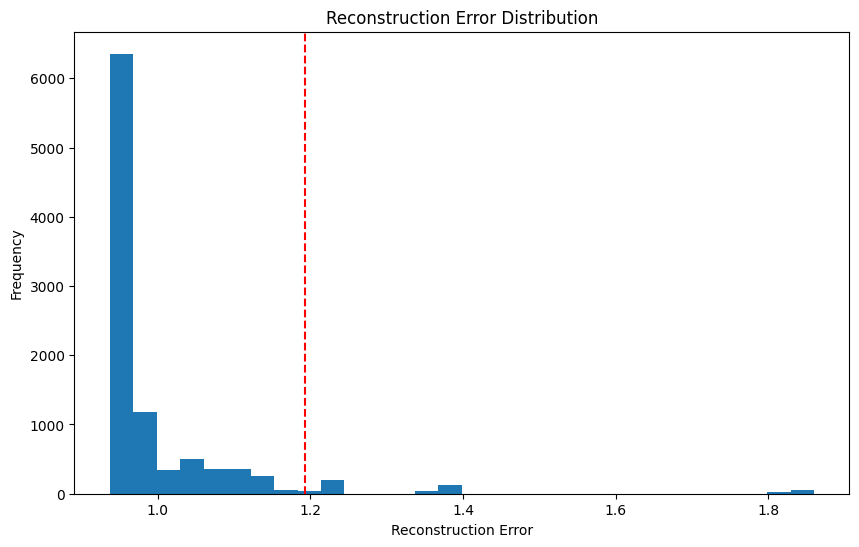

In [ ]:
# Visualizing Reconstruction Error
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=30)
plt.axvline(threshold, color='r', linestyle='--')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

###**Key Findings:**
1. **KMeans Clustering:**
* Detected potential outliers in claims data by clustering similar data points.
* Outliers were identified in the cluster labeled as "4", indicating they deviate significantly from normal claim patterns.
2. **DBSCAN Clustering:**
* This method classified points into core, border, and noise categories.
* Outliers were identified as those labeled -1, indicating they are noise points not fitting into any dense clusters.
3. **Isolation Forest:**
* This model flagged anomalies based on the idea of isolating outliers from the rest of the data.
* Points classified as -1 were considered anomalies, which indicated potential fraudulent claims.
4. **Autoencoder for Anomaly Detection:**
* The Autoencoder was trained to reconstruct input data, and reconstruction errors were calculated.
* High reconstruction errors highlighted discrepancies between the input data and the model's learned representation, indicating possible anomalies.

###**Histogram Analysis of Reconstruction Errors:**
1. **Understanding the Histogram:**
* The histogram represents the distribution of reconstruction errors from the Autoencoder, with the x-axis displaying error values and the y-axis indicating their frequency.
2. **Key Observations:**
* Skewness: The distribution is heavily skewed to the right, indicating a majority of data points have low reconstruction errors, while a smaller subset has significantly higher errors.
* Mode: The most frequent reconstruction error appears to be around 1.0.
* Outliers: A few data points exhibit very high reconstruction errors, visible as a tail on the right side of the histogram.
3. **Interpreting the Results:**
* Model Performance: The model demonstrates effective learning of the underlying data patterns, as evidenced by the majority of data points exhibiting low reconstruction errors.
* Data Distribution: The right-skewed distribution suggests that while most data fits the learned model well, a subset of anomalies or outliers is more challenging for the model to reconstruct.
* Anomaly Detection: The identified outliers could indicate potential errors or anomalies in the claims data, warranting further investigation.

##**Conclusion:**
Overall, the unsupervised models performed well, successfully identifying anomalies that could signify fraudulent claims. The presence of outliers suggests the need for further analysis and potential actions to investigate these anomalies. These findings complement the results from the supervised learning phase, reinforcing the reliability of the models used for fraud detection in healthcare claims.

In [ ]:
fraud_probabilities = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
X_test['Fraud_Risk_Score'] = fraud_probabilities

NameError: name 'model' is not defined